In [2]:
from torch.utils.data import DataLoader
from torchvision.datasets import CocoCaptions, CocoDetection
from torchvision import transforms
from pycocotools import mask, coco
import numpy as np
import matplotlib.pyplot as plt

In [9]:
cats = coco.COCO.loadCats(coco.COCO.getCatIds())
nms=[cat['name'] for cat in cats]

TypeError: getCatIds() missing 1 required positional argument: 'self'

In [4]:
import torch
from torch.utils import data

class Dataset(CocoDetection):
    def __init__(self, root, annFile, transforms=None, transform=None, target_transform=None):
        super().__init__(root, annFile, transforms, transform, target_transform)
        
        cats = self.coco.loadCats(self.coco.getCatIds()) 
        self.id_to_class, self.layer_to_name = dict(), dict()
        self.id_to_class[0] = 0
        self.layer_to_name[0] = 'background'
        for it, cat in enumerate(cats):
            self.id_to_class[cat['id']] = it+1
            self.layer_to_name[it+1] = cat['name']
        
        
    def __getitem__(self, index):
        # Select sample
        img, ann = super().__getitem__(index)
        width, height = img.size[:2]
#         print(img.size)
#         print(ann[0].keys())
        msk = np.zeros((height, width))
#         print(msk.shape)
        for it in ann:
            compressed_rle = mask.frPyObjects(it['segmentation'], height, width)
            bw = np.sum(mask.decode(compressed_rle), axis = 2).astype(bool)
            msk[bw] = self.id_to_class[it['image_id']]
#             print(self.id_to_class[it['image_id']])
#             msk += np.sum(mask.decode(compressed_rle), axis = 2) * self.id_to_layer[it['image_id']]
            
        return img, msk, ann
    
#     def getCatIds():
        
clf = Dataset('/home/vasily/datasets/COCO/images/train2017', '/home/vasily/datasets/COCO/annotations/instances_train2017.json')

loading annotations into memory...
Done (t=10.64s)
creating index...
index created!


In [5]:
img, msk,_ = clf[10]

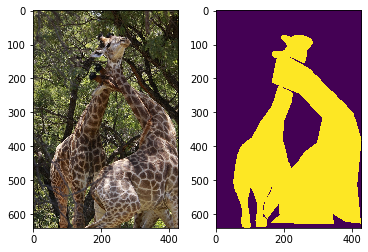

In [6]:
plt.subplot(121)
plt.imshow(img)
plt.subplot(122)
plt.imshow(msk)